# Week2_Breast_Cancer_HW1

## 資料獲取
- sklearn.datasets 有提供此次的 Breast Cancer 資料集

In [1]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data['data']
y = data['target']

# 資料常態分布化
- 從 sklearn.preprocessing 載入 StandardScaler
- 將資料常態分布化，平均值會變為0, 標準差變為1，使離群值影響降低

In [5]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
SC.fit(X)
X = SC.transform(X)
print(X.shape)

(569, 30)


# Features 降維度
- 原始資料集有 30 個 features，為 30 維，需將其降為 2 維
- 此次使用 PCA 降維

In [6]:
from sklearn.decomposition import PCA
# PCA (Principal Component Analysis)
pca = PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)
print(X.shape)

(569, 2)


# 資料集切割
- 透過 sklearn.model_selection 內的 train_test_split 來幫資料集切割出 train set 和 test set
- 切割比率 0.3

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)
print(X_train.shape, X_test.shape)

(398, 2) (171, 2)


# 生成 KNN 模型
- 從 sklearn.neighbors 載入 KNeighborsClassifier
- n_neighbors 設為 5， 也就是框選擇鄰近的 5 個點找中心

In [8]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)

# 畫出 2 分類圖 (一)
- x0_min, x0_max: 建立圖的 x 軸的最大值與最小值
- x1_min, x1_max: 建立圖的 y 軸的最大值與最小值
- np.arange(begin, end, step_size): 生成定義範圍(begin~end) 的 array， 每隔 step_size 建立一筆數值
- np.meshgrid(a_array, b_array): 從一維座標陣列 x1, x2,...,xn 建立一個 N 維矩形網格。

In [10]:
import numpy as np
x0_min, x0_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
x1_min, x1_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x0_min, x0_max, 0.1), np.arange(x1_min, x1_max, 0.1))

# 畫出 2 分類圖 (二)
- 訓練模型

In [11]:
model.fit(X_train, y_train)

KNeighborsClassifier()

# 畫出 2 分類圖 (三)
- 運用 matplotlib 呈現結果

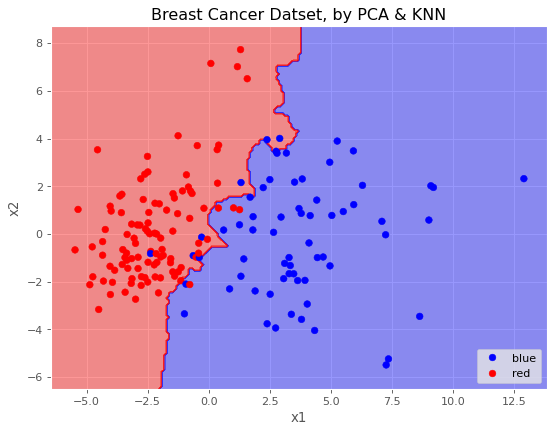

In [16]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')
cmaps = ListedColormap(['blue','red'])
colors = ListedColormap(['blue','red'])
fig = plt.figure(figsize=(8,6),dpi=80)
ax2 = fig.add_subplot(1,1,1)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_title('Breast Cancer Datset, by PCA & KNN')
Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
ax2.contourf(xx, yy, Z, alpha=0.4, cmap=colors)
t = ax2.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmaps)
ax2.legend(handles=t.legend_elements()[0], labels=['blue','red'], loc = 'lower right')
plt.show()

# 印出各項評分 (一)
- 評分項目 (一)
    - Accuracy
    - Precision
    - Recall
    - F1 score

- scikit-learn 中具有許多評分的 algo.，可從 `sklearn.metrics` 導入


In [17]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

print('%s: %.3f' % ('Train Accuracy', accuracy_score(y_train, model.predict(X_train))))
print('%s: %.3f' % ('Test Accuracy', accuracy_score(y_test, model.predict(X_test))))

print('%s: %.3f' % ('Train Prescision Score', precision_score(y_train, model.predict(X_train))))
print('%s: %.3f' % ('Test Prescision Score', precision_score(y_test, model.predict(X_test))))

print('%s: %.3f' % ('Train Recall Score', recall_score(y_train, model.predict(X_train))))
print('%s: %.3f' % ('Test Recall Score', recall_score(y_test, model.predict(X_test))))

print('%s: %.3f' % ('Train F1 Score', f1_score(y_train, model.predict(X_train))))
print('%s: %.3f' % ('Test F1 Score', f1_score(y_test, model.predict(X_test))))

Train Accuracy: 0.950
Test Accuracy: 0.924
Train Prescision Score: 0.957
Test Prescision Score: 0.926
Train Recall Score: 0.964
Test Recall Score: 0.952
Train F1 Score: 0.960
Test F1 Score: 0.939


# 印出各項評分 (三) & 畫出 ROC curve
- 評分項目 (二)
    - Area-under-ROC curve
- 畫出
    - ROC curve
- Note 1: 需了解 model.predict 和 predict_proba 之間的差異
    - predict: 只會回答出機率最高的標籤
    - predict_proba: 返回所有標籤的機率
- Note 2: roc_curve 的第二個參數到底要放入哪個預測的結果(predict or predict_proba)呢 ?
    - 先從結論回答: 都可以，但放入 predict_proba 畫出來的 curve 更具細節。
    - predict 只會吐出機率最高的標籤，因此與原先的答案來比較當然一翻兩瞪眼。
    - predict_proba 是吐出所有標籤的機率，而在 2 分類中每組結果只會有兩個機率，而第二比機率特色是指第二類的可能，因此我們也可視為接近第二類的可能，因此將每筆資料的第二類機率輸入時能有更細微的結果


Area-under-ROC curve: 0.973


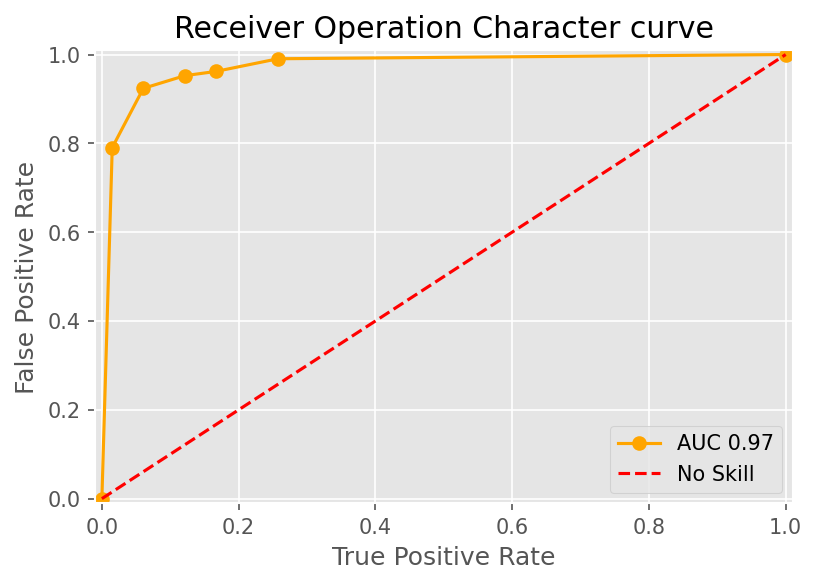

In [30]:
from sklearn.metrics import roc_curve, auc
fpr, tpr , _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr,tpr)
print('Area-under-ROC curve: %0.3f'%(roc_auc))

plt.figure(dpi=150)
plt.title('Receiver Operation Character curve')
plt.plot(fpr,tpr,marker='o',color='orange',label='AUC %0.2f'%roc_auc)
plt.legend(loc = 'lower right')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.plot([0, 1], [0, 1], 'r--', label='No Skill')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()


# 印出各項評分 (四) & 畫出 PR curve
- 評分項目 (二)
    - Area-under-PR curve
- 畫出
    - PR curve

Area-under-PR curve: 0.983


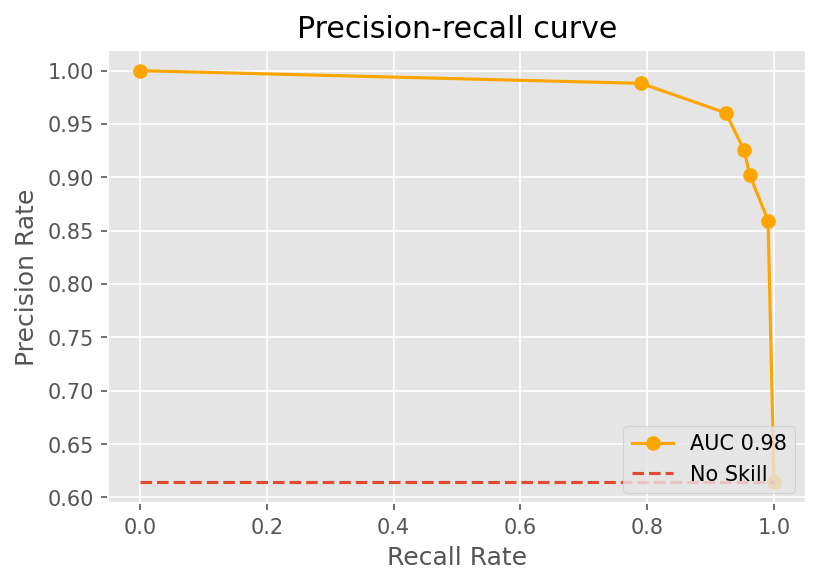

In [35]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1])
prc_auc = auc(recall,precision)
print('Area-under-PR curve: %0.3f'%(prc_auc))

plt.figure(dpi=150)
plt.xlabel('Recall Rate')
plt.ylabel('Precision Rate')
plt.title('Precision-recall curve')
plt.plot(recall,precision,marker='o',color='orange',label='AUC %0.2f'%prc_auc)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.legend(loc='lower right')
plt.show()